In [82]:
import pandas as pd
from prophet import Prophet
import jdatetime

In [83]:
df = pd.read_csv('dataset.csv')

In [84]:
df.head()

,name,dateissue,Value
0,????,14021110,2110339.4
1,????,14021109,2120268.0
2,????,14021108,2128027.7
3,????,14021107,2126829.7
4,????,14021104,2123491.4


In [85]:
df.drop(columns=['name'],inplace=True)

In [86]:
df.isnull().sum()

dateissue    0
Value        0
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dateissue  2140 non-null   int64  
 1   Value      2140 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 33.6 KB


In [88]:
df['dateissue'] = df['dateissue'].astype(str)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dateissue  2140 non-null   object 
 1   Value      2140 non-null   float64
dtypes: float64(1), object(1)
memory usage: 33.6+ KB


In [90]:
def convert_date(x):
    formatted_date = f'{x[:4]}/{x[4:6]}/{x[6:8]}'
    return formatted_date

In [91]:
df['dateissue'] = df['dateissue'].apply(convert_date)

In [92]:
df['dateissue'].head()

0    1402/11/10
1    1402/11/09
2    1402/11/08
3    1402/11/07
4    1402/11/04
Name: dateissue, dtype: object

In [93]:
def convert_date_to_gregorian(x):
    x = str(x)
    years = x[:4]
    months = x[5:7]
    days = x[8:10]
    jalili_date = jdatetime.date(int(years),int(months),int(days)).togregorian()
    t = str(jalili_date)
    return t

In [94]:
df['dateissue'] = df['dateissue'].apply(convert_date_to_gregorian)

In [95]:
df['dateissue'] = pd.to_datetime(df['dateissue'])

In [96]:
data = df[['dateissue','Value']]
data.columns = ['ds','y']
data

,ds,y
0,2024-01-30,2110339.4
1,2024-01-29,2120268.0
2,2024-01-28,2128027.7
3,2024-01-27,2126829.7
4,2024-01-24,2123491.4
...,...,...
2135,2015-03-31,65728.0
2136,2015-03-30,65175.1
2137,2015-03-29,65099.9
2138,2015-03-28,63625.5


In [102]:
model = Prophet()
model.fit(data)
nextyear = model.make_future_dataframe(365)
future_predict = model.predict(nextyear)
future_predict.tail()

23:44:09 - cmdstanpy - INFO - Chain [1] start processing
23:44:13 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2500,2025-01-25,2.768012e+06,2.297253e+06,3.100935e+06,2.373213e+06,3.122958e+06,-50879.058647,-50879.058647,-50879.058647,3597.686656,3597.686656,3597.686656,-54476.745303,-54476.745303,-54476.745303,0.0,0.0,0.0,2.717133e+06
2501,2025-01-26,2.769412e+06,2.303929e+06,3.128033e+06,2.372807e+06,3.126357e+06,-51998.914264,-51998.914264,-51998.914264,3584.689589,3584.689589,3584.689589,-55583.603853,-55583.603853,-55583.603853,0.0,0.0,0.0,2.717413e+06
2502,2025-01-27,2.770812e+06,2.281434e+06,3.113611e+06,2.372402e+06,3.129988e+06,-52272.128915,-52272.128915,-52272.128915,4222.713418,4222.713418,4222.713418,-56494.842333,-56494.842333,-56494.842333,0.0,0.0,0.0,2.718540e+06
2503,2025-01-28,2.772212e+06,2.313921e+06,3.110574e+06,2.372118e+06,3.133156e+06,-52216.692153,-52216.692153,-52216.692153,4992.561662,4992.561662,4992.561662,-57209.253815,-57209.253815,-57209.253815,0.0,0.0,0.0,2.719995e+06
2504,2025-01-29,2.773612e+06,2.302825e+06,3.114337e+06,2.372338e+06,3.134982e+06,-52229.828750,-52229.828750,-52229.828750,5498.750739,5498.750739,5498.750739,-57728.579489,-57728.579489,-57728.579489,0.0,0.0,0.0,2.721382e+06


c:\Users\Elcom\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Elcom\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\Elcom\AppData\Local\Temp\ipykernel_8848\3469897068.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.axes[0].set_xticklabels

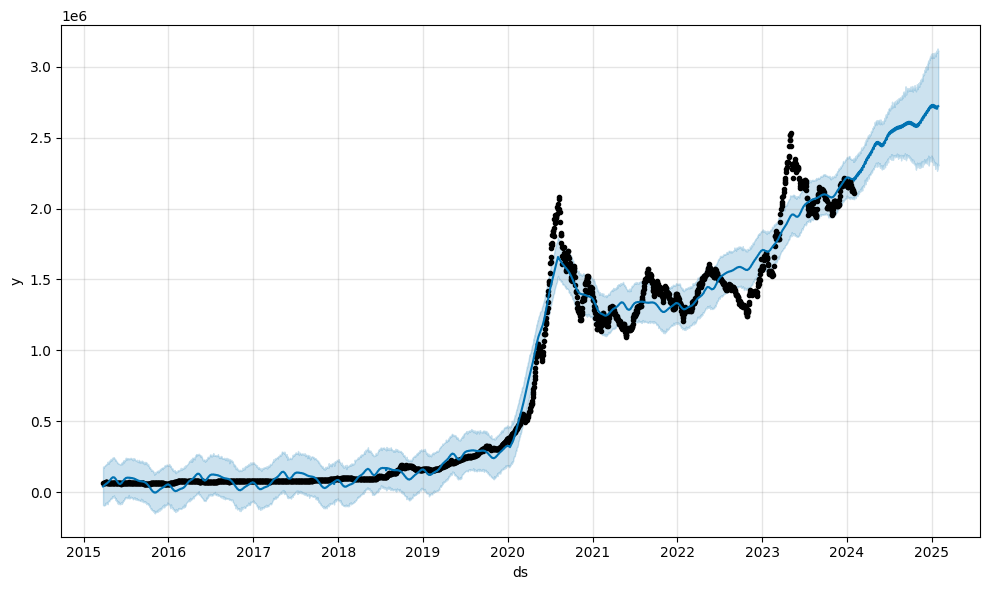

In [103]:
fig = model.plot(future_predict)
xticks = ['2015','2016','2017','2018','2019','2020','2021','2022','2023','2024','2025']
fig.axes[0].set_xticklabels(xticks)
fig.show()